In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import random 
import scipy.stats as stats
import sklearn
from sklearn import linear_model, datasets as ds
from sklearn.preprocessing import PolynomialFeatures

In [18]:
with open('E:/UChicago Courses/Autumn Quarter 2017/Machine Learning/Assignments/HW2/Carseats.csv', newline ='') as data:
        df = pd.read_csv(data, index_col=0, parse_dates=True)
        print(df)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
1     9.50        138      73           11         276    120       Bad   42   
2    11.22        111      48           16         260     83      Good   65   
3    10.06        113      35           10         269     80    Medium   59   
4     7.40        117     100            4         466     97    Medium   55   
5     4.15        141      64            3         340    128       Bad   38   
6    10.81        124     113           13         501     72       Bad   78   
7     6.63        115     105            0          45    108    Medium   71   
8    11.85        136      81           15         425    120      Good   67   
9     6.54        132     110            0         108    124    Medium   76   
10    4.69        132     113            0         131    124    Medium   76   
11    9.01        121      78            9         150    100       Bad   26   
12   11.96        117      94           

In [19]:
df.keys()

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [20]:
df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [21]:
#QUESTION 10

lm = linear_model.LinearRegression()


In [22]:
model = smf.ols(formula='Sales ~ Price + Urban + US', data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.39e-23
Time:                        14:05:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [23]:
#b)Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

#ANSWER:

#1. When price increases by $1 and other predictors are held constant, sales decreases by 54.5 unit sales. 
#2. A store’s sale is not affected by whether or not it is in a Urban area. The coefficient is not significant 
#3. A store in the US sales 1200 more carseats on average than a store that is not based in US. This is a significant coefficient.

In [24]:
#(c) Write out the model in equation form, being careful to handlethe qualitative variables properly.

#ANSWER:

#The model may be written as:
# Sales = 13.0435 + (−0.0545)×Price + (−0.0219)×Urban + (1.2006)×US + error, where Urban = 1, if the store is in an 
#urban location and 0 if not. Similarly US = 1, if the store is in US and 0 if not.

In [25]:
#(d) For which of the predictors can you reject the null hypothesis H0 : Bj = 0?

#ANSWER: The coefficent Urban because it is statistically insignificant with p-value of 0.936

In [26]:
#(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is
# evidence of association with the outcome.

#ANSWER:

model.small = smf.ols(formula='Sales ~ Price + US', data = df)
result = model.small.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.66e-24
Time:                        14:05:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [27]:
#(f) How well do the models in (a) and (e) fit the data?

#ANSWER:

#Both models have a low R-squared value of R-squared:0.239. The F-statistics increases for model with Urban coefficient removed 
#compared to the one that has it. Both models have a mediocre fit at best. 

In [28]:
#g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s)

#ANSWER:
print(result.summary())

#95% interval contained in the table below.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.66e-24
Time:                        14:05:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [29]:
#(h) Is there evidence of outliers or high leverage observations in the model from (e)?

#ANSWER:

#There are none 

In [30]:
#############################QUESTION 14 #################################################################

#A)  
random.seed(1)
#for x1 in range(100):
 #  random.random()
x1 = np.random.rand(100,) # Generates a 10 x 10 array of uniform random numbers.
x2 = 0.5* x1+ np.random.standard_normal((100)) /10
y = 2+2* x1 +0.3* x2+np.random.standard_normal((100))

#Regression Equation: Y=2 + 2x1 + 0.3x2 + error
#Regression Coefficients: 2, 2, 0.3                                        
                   

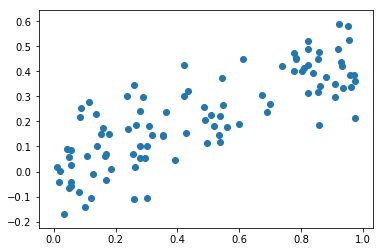

In [31]:
#B) 

np.corrcoef(x1,x2) 
plt.scatter(x1,x2)
plt.show()

In [32]:
#C)
df1 = pd.DataFrame(x1,x2)
lm = smf.ols(formula='y ~ x1 + x2', data = df1)
result = lm.fit()
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     28.09
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.37e-10
Time:                        14:05:59   Log-Likelihood:                -132.78
No. Observations:                 100   AIC:                             271.6
Df Residuals:                      97   BIC:                             279.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8942      0.166     11.439      0.0

In [33]:
#C)

#The coefficients are B^0 = 1.9295 , B^1 = 1.5067 and B^2 = 0.9573. Only B^0 is close to B0. 
#As the p-value is less than 0.05 we may reject H0 for B1, however we can not reject H0 for B2 as the p-value is 
#0.405 which is higher than 0.05.

In [34]:
#D)
lm1 = smf.ols(formula='y ~ x1', data = df1)
result = lm1.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     55.70
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.48e-11
Time:                        14:06:03   Log-Likelihood:                -133.12
No. Observations:                 100   AIC:                             270.2
Df Residuals:                      98   BIC:                             275.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8906      0.165     11.441      0.0

In [35]:
#The coefficient for x1 in this model is very different from the model with x1 and x2 as predictors. 
#In this case x1 is highly significant as its p-value is very low. In this case we can reject the null hypothesis.

In [36]:
#E)
lm2 = smf.ols(formula='y ~ x2', data = df1)
result = lm2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     24.05
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.72e-06
Time:                        14:06:07   Log-Likelihood:                -144.65
No. Observations:                 100   AIC:                             293.3
Df Residuals:                      98   BIC:                             298.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2930      0.164     14.023      0.0

In [37]:
#The coefficient for x2 in this model is very different from the model with x1 and x2 as predictors. 
#In this case x2 is highly significant as its p-value is very low. In this case we can reject the  null hypothesis.

In [38]:
#F)

#The results do not contradict each other. The predictors “x1” and “x2” are highly correlated which makes it
#difficult to determine how each predictor separately is affecting the response. 
#The collinearity causes the errors to grow in model with x1 and x2 as predictors whereas it is low for both the predictors
#where they are used individually. 

In [39]:
#G)

x1 = np.append([x1],[0.1])
len(x1)
x2 = np.append([x2],[0.1])
len(x2)
y= np.append([y],[6])

In [40]:
df2 = pd.DataFrame(x1,x2)
lm1_new = smf.ols(formula='y ~ x1 + x2', data = df2)
result = lm1_new.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     21.25
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.16e-08
Time:                        14:06:15   Log-Likelihood:                -141.99
No. Observations:                 101   AIC:                             290.0
Df Residuals:                      98   BIC:                             297.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9978      0.177     11.288      0.0

In [41]:
lm2_new = smf.ols(formula='y ~ x1', data = df2)
result = lm2_new.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     42.44
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.06e-09
Time:                        14:06:26   Log-Likelihood:                -142.16
No. Observations:                 101   AIC:                             288.3
Df Residuals:                      99   BIC:                             293.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9943      0.176     11.312      0.0

In [42]:
lm3_new = smf.ols(formula='y ~ x2', data = df2)
result = lm3_new.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     20.11
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.97e-05
Time:                        14:06:28   Log-Likelihood:                -150.84
No. Observations:                 101   AIC:                             305.7
Df Residuals:                      99   BIC:                             310.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.3538      0.170     13.826      0.0

In [43]:
#In the model with two predictors, the last point is a high-leverage point. 
#In the model with x1 as predictor the last point is an outlier. 
#In the model with x2 as predictor the last point is a high point.

In [44]:
######################################QUESTION 15###############################################################3

In [45]:
#boston =sklearn.datasets.load_boston()
with open('E:/UChicago Courses/Autumn Quarter 2017/Machine Learning/Assignments/HW2/Boston.csv', newline ='') as data:
        df = pd.read_csv(data, index_col=0, parse_dates=True)
        print(df)



         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
1     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
2     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
3     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
4     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
5     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
6     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
7     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
8     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
9     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
10    0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
11    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
12    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
13    0.09378  12.5   7.8

In [92]:
#A)
lm.zn = smf.ols(formula='CRIM ~ ZN', data = df)
result.zn = lm2_new.fit()
print(result.zn.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     42.44
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.06e-09
Time:                        14:49:19   Log-Likelihood:                -142.16
No. Observations:                 101   AIC:                             288.3
Df Residuals:                      99   BIC:                             293.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9943      0.176     11.312      0.0

In [100]:
lm.ind = smf.ols(formula='CRIM ~ INDUS', data = df)
result.ind = lm.ind.fit()
print(result.ind.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.45e-21
Time:                        14:58:07   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.0

In [101]:
lm.chas = smf.ols(formula='CRIM ~ CHAS', data = df)
result.chas = lm.chas.fit()
print(result.chas.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Wed, 11 Oct 2017   Prob (F-statistic):              0.209
Time:                        14:58:29   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.0

In [102]:
lm.nox = smf.ols(formula='CRIM ~ NOX', data = df)
result.nox = lm.nox.fit()
print(result.nox.summary())



                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.75e-23
Time:                        14:58:30   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.0

In [103]:
lm.rm = smf.ols(formula='CRIM ~ RM', data = df)
result.rm = lm.rm.fit()
print(result.rm.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           6.35e-07
Time:                        14:58:38   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.0

In [135]:
lm.age = smf.ols(formula='CRIM ~ AGE', data = df)
result.age = lm.age.fit()
print(result.age.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.85e-16
Time:                        15:15:07   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.0

In [104]:
lm.chase = smf.ols(formula='CRIM ~ CHAS', data = df)
result.chase = lm.chase.fit()
print(result.chase.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Wed, 11 Oct 2017   Prob (F-statistic):              0.209
Time:                        14:58:47   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.0

In [105]:
lm.dis = smf.ols(formula='CRIM ~ DIS', data = df)
result.dis = lm.dis.fit()
print(result.dis.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           8.52e-19
Time:                        14:58:53   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.0

In [106]:
lm.rad = smf.ols(formula='CRIM ~ RAD', data = df)
result.rad = lm.rad.fit()
print(result.rad.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.69e-56
Time:                        14:59:03   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.0

In [107]:
lm.tax = smf.ols(formula='CRIM ~ TAX', data = df)
result.tax = lm.tax.fit()
print(result.tax.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.36e-47
Time:                        14:59:10   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.0

In [108]:
lm.ptratio  = smf.ols(formula='CRIM ~ PTRATIO ', data = df)
result.ptratio = lm.ptratio.fit()
print(result.ptratio.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.94e-11
Time:                        14:59:20   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.6469      3.147     -5.607      0.0

In [109]:
lm.black  = smf.ols(formula='CRIM ~ BLACK', data = df)
result.black = lm.black.fit()
print(result.black.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.49e-19
Time:                        14:59:28   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     16.5535      1.426     11.609      0.0

In [110]:
lm.lstat = smf.ols(formula='CRIM ~ LSTAT', data = df)
result.lstat = lm.lstat.fit()
print(result.lstat.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.65e-27
Time:                        14:59:39   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.3305      0.694     -4.801      0.0

In [99]:
lm.medv = smf.ols(formula='CRIM ~ MEDV', data = df)
result.medv = lm.medv.fit()
print(result.medv.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.17e-19
Time:                        14:57:11   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.0

In [ ]:
#To find which predictors are significant, we have to test H0:B1=0
#All predictors have a p-value less than 0.05 except CHAS , so we may conclude that there is a 
#statistically significant association between each predictor and the response except for the CHAS predictor.



In [95]:
#B)

lm.all = smf.ols(formula='CRIM ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + BLACK + LSTAT + MEDV ', data = df)
result.all = lm.all.fit()
print(result.all.summary())

#The R-squared is low, 45% which does not make this a good model. 
#We may reject the null hypothesis for ZN, NOX, DIS, RAD, BLACK, LASTAT ADN MEDV. All these coefficients have low p-value 
#and are significant 



                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.57e-56
Time:                        14:54:05   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

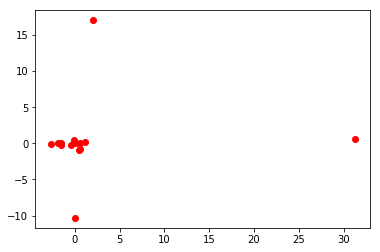

In [137]:
#C

a=np.array([[result.zn.params[1]], [result.chas.params[1]],[result.rm.params[1]], [result.rad.params[1]],[result.tax.params[1]],
           [result.black.params[1]],[result.lstat.params[1]],[result.ind.params[1]], [result.nox.params[1]], [result.age.params[1]],
           [result.dis.params[1]],[result.dis.params[1]],[result.ptratio.params[1]],[result.medv.params[1]]])

b=np.array([[result.all.params]])
plt.scatter(a,b, c= 'red')
plt.show()

In [138]:
#C

#There is a difference between the simple and multiple regression coefficients. This difference is due to the fact that in 
#the simple regression case, the coefficient represents the effect of an increase in the predictor while ignoring other 
#predictors. In contrast, in the multiple regression case, the slope term represents the average effect of an increase in
#the predictor, while holding other predictors fixed. There is collinearity between the predictors which affects the multiplle 
#regression as well.




In [65]:
#D)

poly = PolynomialFeatures(degree=3)
zn = poly.fit_transform(df.loc[:, ['ZN']])
lm.zn2 = smf.ols(formula= 'CRIM ~ zn', data =df)
result = lm.zn2.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.28e-06
Time:                        14:20:41   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.4230      0.216     11.192      0.0

In [66]:
indus = poly.fit_transform(df.loc[:, ['INDUS']])
lm.indus2 = smf.ols(formula= 'CRIM ~ indus', data =df)
result = lm.indus2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.55e-32
Time:                        14:20:42   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8313      0.787      2.327      0.0

In [67]:
chas = poly.fit_transform(df.loc[:, ['CHAS']])
lm.chas2 = smf.ols(formula= 'CRIM ~ chas', data =df)
result = lm.chas2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Wed, 11 Oct 2017   Prob (F-statistic):              0.209
Time:                        14:20:42   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8722      0.198      9.453      0.0

In [68]:
nox = poly.fit_transform(df.loc[:, ['NOX']])
lm.nox2 = smf.ols(formula= 'CRIM ~ nox', data =df)
result = lm.nox2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.81e-38
Time:                        14:20:42   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    116.5433     16.822      6.928      0.0

In [69]:
rm = poly.fit_transform(df.loc[:, ['RM']])
lm.rm2 = smf.ols(formula= 'CRIM ~ rm', data =df)
result = lm.rm2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.07e-07
Time:                        14:20:42   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     56.3123     32.259      1.746      0.0

In [70]:
age = poly.fit_transform(df.loc[:, ['AGE']])
lm.age2 = smf.ols(formula= 'CRIM ~ age', data =df)
result = lm.age2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.02e-20
Time:                        14:20:43   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.2744      1.385     -0.920      0.3

In [71]:
dis = poly.fit_transform(df.loc[:, ['DIS']])
lm.dis2 = smf.ols(formula= 'CRIM ~ dis', data =df)
result = lm.dis2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.14e-35
Time:                        14:20:43   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.0238      1.223     12.285      0.0

In [72]:
rad = poly.fit_transform(df.loc[:, ['RAD']])
lm.rad2 = smf.ols(formula= 'CRIM ~ rad', data =df)
result = lm.rad2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.31e-55
Time:                        14:20:43   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3028      1.025     -0.295      0.7

In [73]:
tax = poly.fit_transform(df.loc[:, ['TAX']])
lm.tax2 = smf.ols(formula= 'CRIM ~ tax', data =df)
result = lm.tax2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           7.34e-50
Time:                        14:20:43   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.5918      5.898      1.626      0.1

In [74]:
ptratio = poly.fit_transform(df.loc[:, ['PTRATIO']])
lm.ptratio2 = smf.ols(formula= 'CRIM ~ ptratio', data =df)
result = lm.ptratio2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           4.17e-13
Time:                        14:20:43   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    238.5920     78.397      3.043      0.0

In [78]:
b = poly.fit_transform(df.loc[:, ['BLACK']])
lm.b2 = smf.ols(formula= 'CRIM ~ b', data =df)
result = lm.b2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     29.49
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.41e-17
Time:                        14:24:03   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3539.
Df Residuals:                     502   BIC:                             3555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.1319      1.152      7.924      0.0

In [76]:
lstat = poly.fit_transform(df.loc[:, ['LSTAT']])
lm.lstat2 = smf.ols(formula= 'CRIM ~ lstat', data =df)
result = lm.lstat2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.35e-26
Time:                        14:20:44   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6005      1.014      0.592      0.5

In [77]:
medv = poly.fit_transform(df.loc[:, ['MEDV']])
lm.medv2 = smf.ols(formula= 'CRIM ~ medv', data =df)
result = lm.medv2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           4.45e-59
Time:                        14:20:44   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     26.5828      1.678     15.840      0.0

In [ ]:
#For coefficients ZN, CHAS, RM, RAD, TAX, BLACK ADN LSTAT are not statistically significant. 
#For coefficients INDUS, NOX, AGE, DIS, PTRATIO AND MEDV are statitically significant with non-linear relationship.